In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys

import numpy as np
import pandas as pd

sys.path.insert(0, '..')
from context.fit_skew_t_pdf import fit_skew_t_pdf
from context.fit_skew_t_pdfs import fit_skew_t_pdfs
from context.compute_context import compute_context
from context.make_context_matrix_and_summarize_context import *
from context.plot_context import plot_context

In [3]:
feature_x_sample = pd.read_table('feature_x_sample.tsv', index_col=0)

feature_x_sample

,22RV1_PROSTATE,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,786O_KIDNEY,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A549_LUNG,A673_BONE,ACHN_KIDNEY,...,UACC812_BREAST,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,ZR751_BREAST
KRAS,2.431950,2.285786,0.093278,-0.715936,1.446825,1.937605,1.022591,-1.911792,1.947112,1.467027,...,-0.277204,1.194503,-0.324539,1.049923,0.322982,0.393212,-0.426775,-1.032427,2.210129,-0.738514
SOX10,-1.729977,1.724498,0.785717,-1.777906,1.183808,-0.975388,-5.992516,0.625689,1.845708,-1.114818,...,0.809880,-8.072094,-1.209092,-6.693631,-8.448398,-4.202099,-7.521501,-0.192991,-1.535883,1.274517
ERBB3,1.021403,0.712437,-1.100162,0.785717,1.013481,0.091852,0.655001,-0.131000,0.709268,0.193652,...,-6.012322,2.102783,0.863751,0.895440,-0.205627,1.639730,1.198464,-1.981507,-0.980537,-0.663253
MYC,1.775596,1.147762,-1.435271,2.407392,2.166557,0.910492,1.991476,-0.421626,0.796412,0.927129,...,0.818991,1.921365,-1.837323,-0.507978,-0.157262,1.705485,-1.593715,-2.390292,-0.879529,-1.463791
MAP4K4,2.066341,-1.407940,0.790867,0.523096,1.990684,0.792451,1.999794,-0.759904,-0.102242,0.269784,...,0.022623,-0.197348,0.069709,0.363939,3.109298,0.829686,2.083770,2.391151,2.629609,-0.860912
GAPDH,3.396082,-1.558858,-2.408117,4.163743,-1.689970,4.258810,-3.452659,2.090504,-0.743267,4.488553,...,3.088701,3.436089,-2.498034,3.822296,-2.300772,1.083196,-1.591735,-0.957959,-2.087268,2.035444
FAT1,0.220865,-1.712152,0.526265,0.066738,-0.680682,0.369921,-0.762280,-0.769014,-0.406970,-1.101747,...,-1.074415,-0.477477,0.133958,-0.710786,-1.296237,-0.332263,1.385824,0.458531,1.329972,-0.182415
PTEN,-1.100954,-0.011806,-1.834946,-0.302397,-1.692347,-0.164115,-0.849821,-0.558284,-1.029259,-1.683632,...,-1.581040,-0.725442,0.109399,-0.209152,-0.649785,-1.444382,1.653594,0.438725,1.308979,-1.032427
TP53,-0.659688,2.229142,-0.881906,2.277468,1.315316,2.018016,-2.274232,0.403867,-1.410316,0.447439,...,-0.821697,5.142135,1.092703,6.433453,2.424820,2.496912,-0.793177,-1.375063,-2.045281,2.094465


In [4]:
array_1d = np.random.random_sample(10)

In [5]:
n, location, scale, df, shape = fit_skew_t_pdf(array_1d)

print('N={}\tLocation={}\tScale={}\tDF={}\tShape={}'.format(
    n, location, scale, df, shape))

N=10	Location=0.8387744034282838	Scale=0.37775784799945766	DF=14824715.344357315	Shape=-8794845.471355315


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


In [6]:
context_dict = compute_context(array_1d)

for key, value in context_dict.items():
    print(key)
    print(value)
    print(value.shape)
    print()

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


fit
[  1.00000000e+01   8.38774403e-01   3.77757848e-01   1.48247153e+07
  -8.79484547e+06]
(5,)

grid
[ 0.12083355  0.12107294  0.12131233 ...,  0.83829541  0.8385348   0.8387742 ]
(3000,)

pdf
[ 0.34704522  0.34746338  0.34788192 ...,  2.11215707  2.11215834
  2.11215747]
(3000,)

pdf_transformed
[ 0.          0.          0.         ...,  2.11215579  2.11215661
  2.11215544]
(3000,)

context_indices
[-1.         -1.         -1.         ..., -0.87840562  0.88077661
  0.88205606]
(3000,)

context_indices_like_array
[-1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.          0.88205606]
(10,)

context_summary
-4.58221990135
()



In [7]:
feature_x_skew_t_pdf_fit_parameter = fit_skew_t_pdfs(feature_x_sample)

feature_x_skew_t_pdf_fit_parameter

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


,N,Location,Scale,DF,Shape
Feature,,,,,
KRAS,501.0,2.068980,2.225392,4.304422,-3.030173
SOX10,501.0,1.051450,1.132259,2.306305,-0.930057
ERBB3,501.0,0.862760,1.159921,3.987373,-1.111800
MYC,501.0,-1.809738,2.345973,15.292832,2.261240
MAP4K4,501.0,0.920806,1.693188,7.522633,-0.764383
GAPDH,501.0,-3.187270,4.318654,2896.849727,2.329269
FAT1,501.0,-0.333015,0.693167,15.376319,0.699478
PTEN,501.0,-1.546137,2.022107,1182.933645,3.099775
TP53,501.0,-2.596610,2.878721,6.161664,5.347669


In [8]:
context__feature_x_sample, feature_context_summary = make_context_matrix_and_summarize_context(
    feature_x_sample)

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)
/Users/k/Jumis/conda/lib/python3.6/site-packages/

In [9]:
context__feature_x_sample

,22RV1_PROSTATE,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,786O_KIDNEY,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A549_LUNG,A673_BONE,ACHN_KIDNEY,...,UACC812_BREAST,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,ZR751_BREAST
Feature,,,,,,,,,,,,,,,,,,,,,
KRAS,0.000000,0.000000,-4.463804e-01,-0.850880,0.000000,0.000000,-0.000000,-0.996307,0.000000e+00,0.000000,...,-0.665444,0.000000,-0.690058,-0.000000,-0.284298,-0.228985,-0.739813,-9.299434e-01,0.000000,-0.858360
SOX10,-0.877722,0.000000,0.000000e+00,-0.890488,0.000000,-0.517001,-1.000000,0.000000,0.000000e+00,-0.603756,...,0.000000,-1.000000,-0.657490,-1.000000,-1.000000,-0.999996,-1.000000,-1.133226e-02,-0.812057,0.000000
ERBB3,0.000000,0.000000,-3.220334e-01,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000e+00,-0.000000,...,-1.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-8.369680e-01,-0.247992,-0.092322
MYC,0.631304,0.329605,-0.000000e+00,0.855659,0.784471,0.224540,0.720996,0.000000,1.802383e-01,0.230974,...,0.189051,0.692997,-0.000000,0.000000,0.000000,0.599551,-0.000000,-0.000000e+00,-0.000000,-0.000000
MAP4K4,0.000000,-0.006296,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000e+00,0.000000,...,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.000000
GAPDH,0.339604,-0.000000,-0.000000e+00,0.576192,-0.000000,0.604067,-0.000000,0.059361,3.839118e-13,0.668712,...,0.251907,0.352041,-0.000000,0.472808,-0.000000,0.004643,-0.000000,0.000000e+00,-0.000000,0.053598
FAT1,0.000000,-0.000000,7.616275e-08,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000e+00,-0.000000,...,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.046904,1.300954e-09,0.031885,-0.000000
PTEN,-0.000000,0.000384,-0.000000e+00,0.000001,-0.000000,0.000033,-0.000000,0.000000,-0.000000e+00,-0.000000,...,-0.000000,-0.000000,0.001709,0.000013,-0.000000,-0.000000,0.830949,2.828995e-02,0.594216,-0.000000
TP53,0.559658,1.000000,3.798585e-01,1.000000,0.999839,0.999999,-0.000000,0.976603,0.000000e+00,0.980439,...,0.431307,1.000000,0.999307,1.000000,1.000000,1.000000,0.458299,0.000000e+00,-0.000000,1.000000


In [10]:
feature_context_summary

Feature
KRAS     -384.454026
SOX10    -275.328011
ERBB3    -151.793407
MAP4K4    -96.620166
FAT1        5.987314
PTEN      179.746882
MYC       238.924013
GAPDH     291.698566
TP53      474.377050
Name: Context Summary, dtype: float64

In [11]:
absolute_value_weighted_context__feature_x_sample = feature_x_sample.abs(
) * context__feature_x_sample

absolute_value_weighted_context__feature_x_sample

,22RV1_PROSTATE,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,786O_KIDNEY,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A549_LUNG,A673_BONE,ACHN_KIDNEY,...,UACC812_BREAST,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,ZR751_BREAST
KRAS,0.000000,0.000000,-4.163727e-02,-6.091754e-01,0.000000,0.000000,-0.000000,-1.904731,0.000000e+00,0.000000,...,-0.184464,0.000000,-0.223951,-0.000000,-0.091823,-0.090040,-0.315734,-9.600991e-01,0.000000,-0.633911
SOX10,-1.518438,0.000000,0.000000e+00,-1.583204e+00,0.000000,-0.504276,-5.992516,0.000000,0.000000e+00,-0.673079,...,0.000000,-8.072094,-0.794966,-6.693631,-8.448398,-4.202081,-7.521501,-2.187026e-03,-1.247225,0.000000
ERBB3,0.000000,0.000000,-3.542890e-01,0.000000e+00,0.000000,-0.000000,0.000000,-0.000000,0.000000e+00,-0.000000,...,-6.012322,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-1.658458e+00,-0.243165,-0.061233
MYC,1.120941,0.378308,-0.000000e+00,2.059906e+00,1.699600,0.204442,1.435847,0.000000,1.435440e-01,0.214143,...,0.154831,1.331500,-0.000000,0.000000,0.000000,1.022525,-0.000000,-0.000000e+00,-0.000000,-0.000000
MAP4K4,0.000000,-0.008864,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-0.000000,-0.000000e+00,0.000000,...,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.000000
GAPDH,1.153322,-0.000000,-0.000000e+00,2.399115e+00,-0.000000,2.572608,-0.000000,0.124094,2.853490e-13,3.001550,...,0.778067,1.209645,-0.000000,1.807211,-0.000000,0.005030,-0.000000,0.000000e+00,-0.000000,0.109096
FAT1,0.000000,-0.000000,4.008181e-08,0.000000e+00,-0.000000,0.000000,-0.000000,-0.000000,-0.000000e+00,-0.000000,...,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.065000,5.965272e-10,0.042406,-0.000000
PTEN,-0.000000,0.000005,-0.000000e+00,3.690352e-07,-0.000000,0.000005,-0.000000,0.000000,-0.000000e+00,-0.000000,...,-0.000000,-0.000000,0.000187,0.000003,-0.000000,-0.000000,1.374053,1.241151e-02,0.777817,-0.000000
TP53,0.369199,2.229142,3.349994e-01,2.277467e+00,1.315105,2.018014,-0.000000,0.394418,0.000000e+00,0.438687,...,0.354404,5.142135,1.091945,6.433453,2.424820,2.496912,0.363513,0.000000e+00,-0.000000,2.094464


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


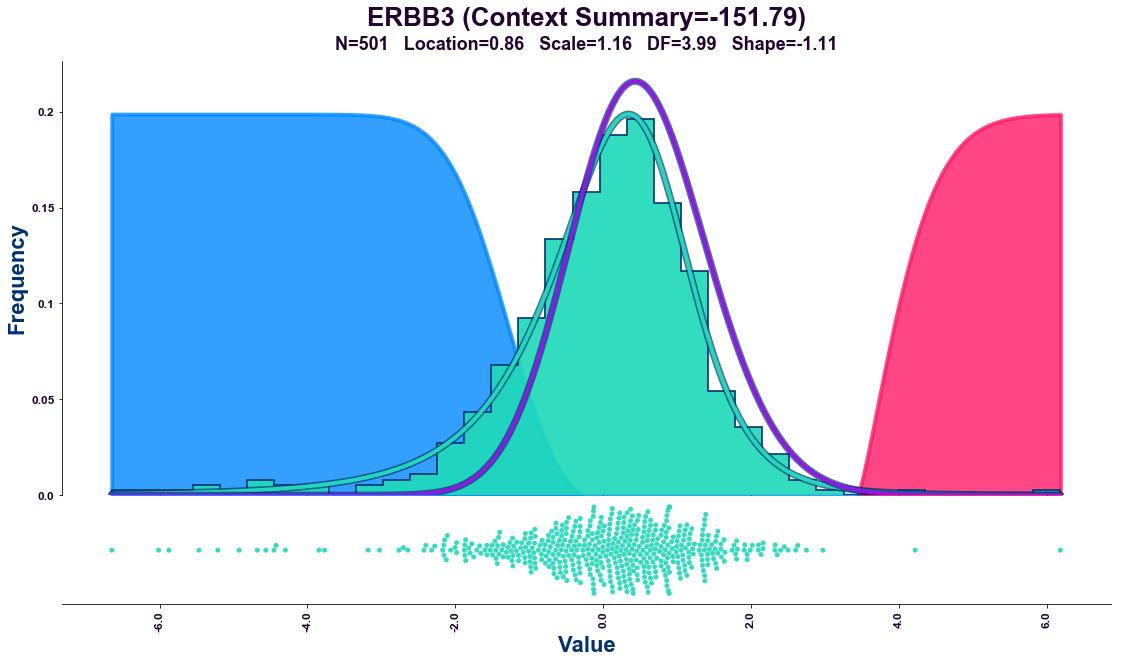

In [12]:
feature = 'ERBB3'

plot_context(feature_x_sample.loc[feature], feature)